# 📊 Customer Churn Prediction

This notebook walks through the process of analyzing and predicting customer churn using the Telco dataset.

In [6]:
# 🔧 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [15]:
# 📥 Load Dataset
df = pd.read_csv('../data/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [13]:
# Encode Categorical Features
df['Churn'] = 0

for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        df[col] = LabelEncoder().fit_transform(df[col])
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

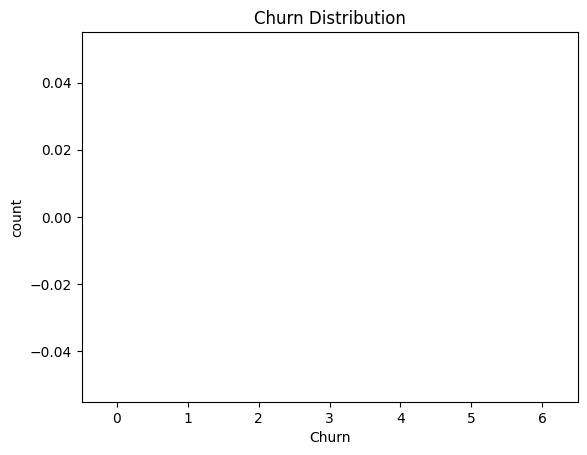

In [14]:
# Exploratory Data Analysis
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

In [ ]:
# Model Training
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f'ROC AUC: {roc_auc:.2f}')